In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense,
                                     Dropout, BatchNormalization)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


In [2]:
#Loading The Data
train_df = pd.read_csv('/content/drive/MyDrive/Deep_learning_code/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Deep_learning_code/test.csv')



In [3]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Extract features and labels
X_train = train_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255
y_train = train_df.iloc[:, 0].values
X_test = test_df.values.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train, num_classes=10)

In [19]:
X_train.shape

(33600, 28, 28, 1)

In [20]:
X_test.shape

(28000, 28, 28, 1)

In [6]:

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

In [7]:

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [8]:
datagen.fit(X_train)
val_datagen = ImageDataGenerator()
val_datagen.fit(X_val)

In [9]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),

    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Learning rate scheduling and early stop
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

In [11]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=10,
    validation_data=val_datagen.flow(X_val, y_val, batch_size=64),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


525/525 ━━━━━━━━━━━━━━━━━━━━ 122s 219ms/step - accuracy: 0.6200 - loss: 1.2884 - val_accuracy: 0.9583 - val_loss: 0.1722 - learning_rate: 0.0010
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 132s 201ms/step - accuracy: 0.9234 - loss: 0.2524 - val_accuracy: 0.9837 - val_loss: 0.0490 - learning_rate: 0.0010
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 102s 194ms/step - accuracy: 0.9478 - loss: 0.1619 - val_accuracy: 0.9861 - val_loss: 0.0396 - learning_rate: 0.0010
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 104s 198ms/step - accuracy: 0.9626 - loss: 0.1257 - val_accuracy: 0.9900 - val_loss: 0.0305 - learning_rate: 0.0010
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 142s 199ms/step - accuracy: 0.9672 - loss: 0.1138 - val_accuracy: 0.9894 - val_loss: 0.0308 - learning_rate: 0.0010
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 104s 197ms/step - accuracy: 0.9693 - loss: 0.0974 - val_accuracy: 0.9912 - val_loss: 0.0273 - learning_rate: 0.0010
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 143s 199ms/step - accuracy: 0.9737 

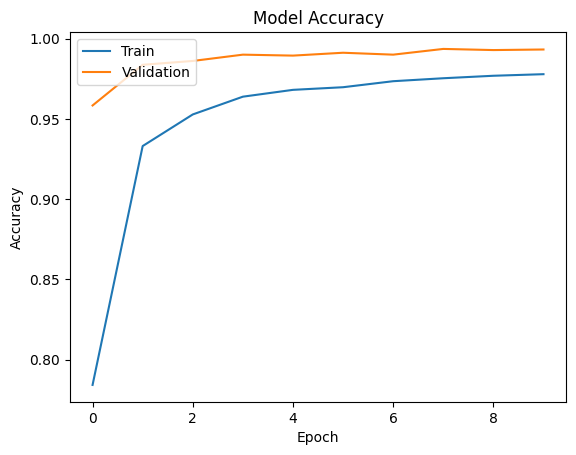

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

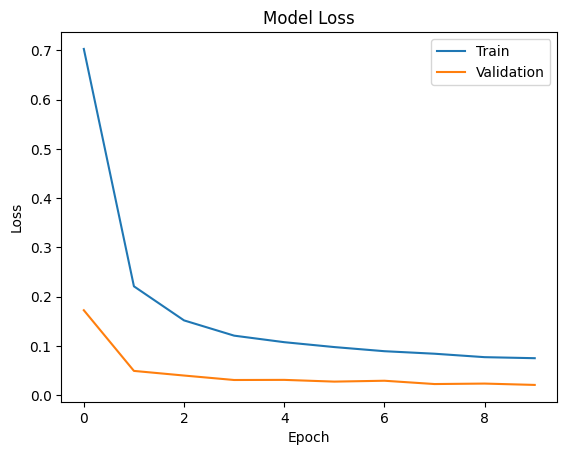

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

In [14]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred,axis=1)
y_pred_labels


875/875 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step


array([2, 0, 9, ..., 3, 9, 2])